# Capstone Project

## Heart Disease Detection

**By Charu Chhimpa** 

---

A project to identify that a person is suffering from heart disease or not using Support Vector Machine as a training Model.

---


### The Road Ahead

I break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Training Benchmark Model
* [Step 2](#step2): Training Original Model

---
<a id='step0'></a>
## Step 0: Data Exploration and Analysis


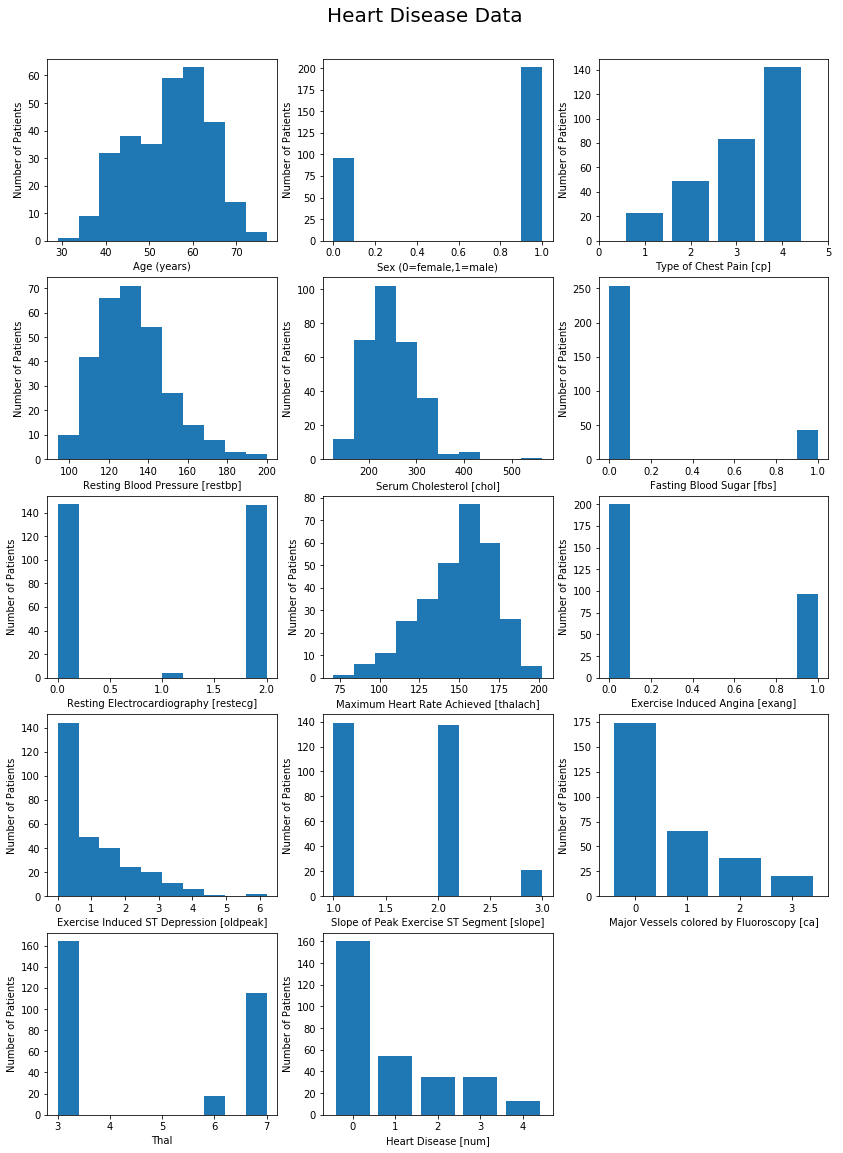

('\nTotal patients in dataset ', 297)
('Total patients which are having disease', 137)
('Total patients which are not having disease ', 160)
    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  hd  cp_1  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0   0     1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0   1     0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0   1     0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0   0     0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0   0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1       1       0  
1     0     0       0       1        0        0       0       0  
2     0     0       0       1        0        0       0       1  
3     0     1       0       0        0        1       0       0  
4     1     0       0       1        1        0       0       0  
      

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint



columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df1 = pd.read_table("cleveland1.csv", sep=',', header=None, names=columns)


# plot histograms of some features

fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(14,18) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.94 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(df1.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df1.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df1.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df1.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df1.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df1.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df1.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df1.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df1.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df1.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df1.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df1.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df1.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df1.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")
plt.show()


#Convert varibales with more than two values into dummy variables
df      = df1.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df      = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df      = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df      = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df      = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df      = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df      = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

# Change the name and value of response variable 
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"num":"hd"})

# New list of column labels
new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]


print ('\nTotal patients in dataset ',(len(df.index)))
print ('Total patients which are having disease', len(df[df.hd==1].index))
print ('Total patients which are not having disease ', len(df[df.hd==0].index))     


print (df.head())
print (df.describe())

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists
y_all = stddf["hd"]
X_all = stddf[new_columns_2[1:]].values
X_all = np.array(X_all)
print(X_all)



---
<a id='step1'></a>
### Feature Distributions Compared for Disease and No Disease



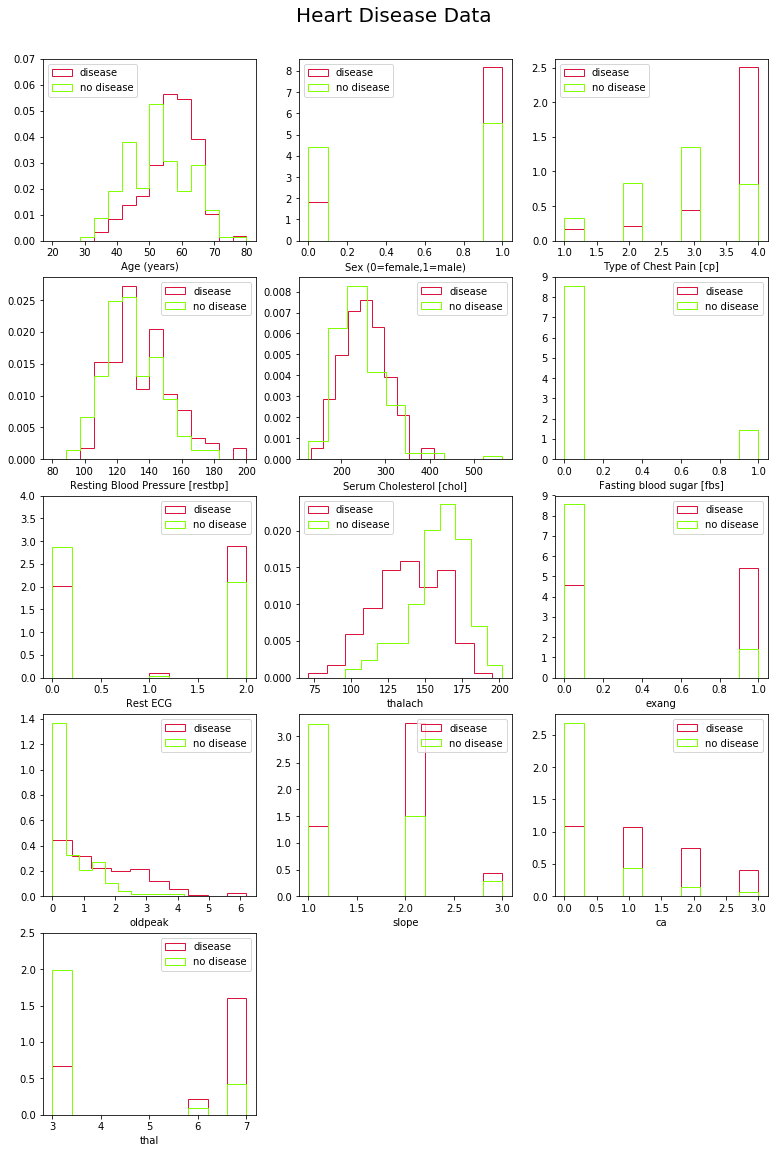

In [2]:
#feature distributions compared for disease and no-disease (likelihoods)

fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(13,18) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.94 )
plt.suptitle("Heart Disease Data", fontsize=20)

bins = np.linspace(20, 80, 15)
axes[0,0].hist(df1[df1.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df1[df1.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")
axes[0,1].hist(df1[df1.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,1].hist(df1[df1.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")
axes[0,2].hist(df1[df1.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[0,2].hist(df1[df1.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[1,0].hist(df1[df1.num>0].restbp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df1[df1.num==0].restbp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].legend(prop={'size': 10},loc="upper right")
axes[1,1].hist(df1[df1.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,1].hist(df1[df1.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].legend(prop={'size': 10},loc="upper right")
axes[1,2].hist(df1[df1.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[1,2].hist(df1[df1.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[1,2].set_xlabel("Fasting blood sugar [fbs]")
axes[1,2].legend(prop={'size': 10},loc="upper right")
axes[2,0].hist(df1[df1.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,0].hist(df1[df1.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,0].set_xlabel("Rest ECG")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")
axes[2,1].hist(df1[df1.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df1[df1.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("thalach")
axes[2,1].legend(prop={'size': 10},loc="upper left")
axes[2,2].hist(df1[df1.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[2,2].hist(df1[df1.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")
axes[3,0].hist(df1[df1.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,0].hist(df1[df1.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")
axes[3,1].hist(df1[df1.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,1].hist(df1[df1.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")
axes[3,2].hist(df1[df1.num>0].ca.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[3,2].hist(df1[df1.num==0].ca,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[3,2].set_xlabel("ca")
axes[3,2].legend(prop={'size': 10},loc="upper right")
axes[4,0].hist(df1[df1.num>0].thal.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[4,0].hist(df1[df1.num==0].thal,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylim(0.0,2.5)
axes[4,0].legend(prop={'size': 10},loc="upper right")
axes[4,1].axis("off")
axes[4,2].axis("off")
plt.show()

---
<a id='step1'></a>
## Step 1: Training with Benchmark Model


### Importing various libraries

In [7]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import itertools
from pprint import pprint
from sklearn.cross_validation import train_test_split

---
<a id='step1'></a>
## Training

Using Gaussian Naive Bayes as the Benchmark model using which we can test our current model.

In [22]:
#splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
print('training and testing was successfull')
clf = GaussianNB()
clf_fit = clf.fit(X_train, y_train)

training and testing was successfull


### Calculating Accuracy for Gaussian Naive Bayes

In [24]:
y_pred = clf_fit.predict(X_test)

y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

gnb_score = clf_fit.score(y_test, y_pred)
print ('the final score for gaussian naive bayes is:', gnb_score)

the final score for gaussian naive bayes is: 0.783333333333


<a id='step1'></a>
## Step2 : Training with Original Model

### Importing Various Libraries

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import itertools
from pprint import pprint
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

## Training 
Using Suppport Vector Machine as the original model for training

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
print('training and testing was successfull')

clf_svc = SVC()

clf_svc.fit(X_train, y_train)

training and testing was successfull


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

---
<a id='step2'></a>
### Predicting for the test set



In [4]:
y_pred = clf_svc.predict(X_test)
y_test = np.array(y_test)  

print ("the actual lables are : ",y_test)  

print("the predicted labels are : ",y_pred)


('the actual lables are : ', array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]))
('the predicted labels are : ', array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]))


<a id='step1'></a>
## Step2 : Optmizing the Model

Optmizing the model on accuracy score using cross validation score. 



In [ ]:
'''
Optimize Support Vector Machines on accuracy score, using cross-validation.
Here we use sklearn since it includes a cross_validation method.
'''


print("done")
best_score = []
best_std   = []
best_comb  = []
nfeatures  = 18
iterable   = range(nfeatures)
model      = SVC()
for s in xrange(len(iterable)+1):
    for comb in itertools.combinations(iterable, s):
        if len(comb) > 0:
            X_sel = []
            for patient in X_all:
                X_sel.append([patient[ind] for ind in comb])
            this_scores = cross_val_score(model, X_sel, y=y_all, cv=3 )
            score_mean  = np.mean(this_scores)
            score_std   = np.std(this_scores)
            if len(best_score) > 0: 
                if score_mean > best_score[0]:
                    best_score = []
                    best_std   = []
                    best_comb  = []
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
                elif score_mean == best_score[0]:
                    best_score.append(score_mean)
                    best_std.append(score_std)
                    best_comb.append(comb)
            else:
                best_score.append(score_mean)
                best_std.append(score_std)
                best_comb.append(comb)


done


###  Calculating Final Accuracy


In [4]:
#finding the best score after selecting the features

num_ties = len(best_score)
for ind in range(num_ties):
    print 'For comb=%s, Support Vector Classifier Accuracy = %f +/- %f' \
            % (best_comb[ind],best_score[ind],best_std[ind])

For comb=(0, 1, 4, 5, 6, 7, 8, 10, 12, 14, 16, 17), Support Vector Classifier Accuracy = 0.848440 +/- 0.008989


###  Some different Visualizations

I visualized a diffferent feature in this dataset. There was correlation between features age, thalach and ca.


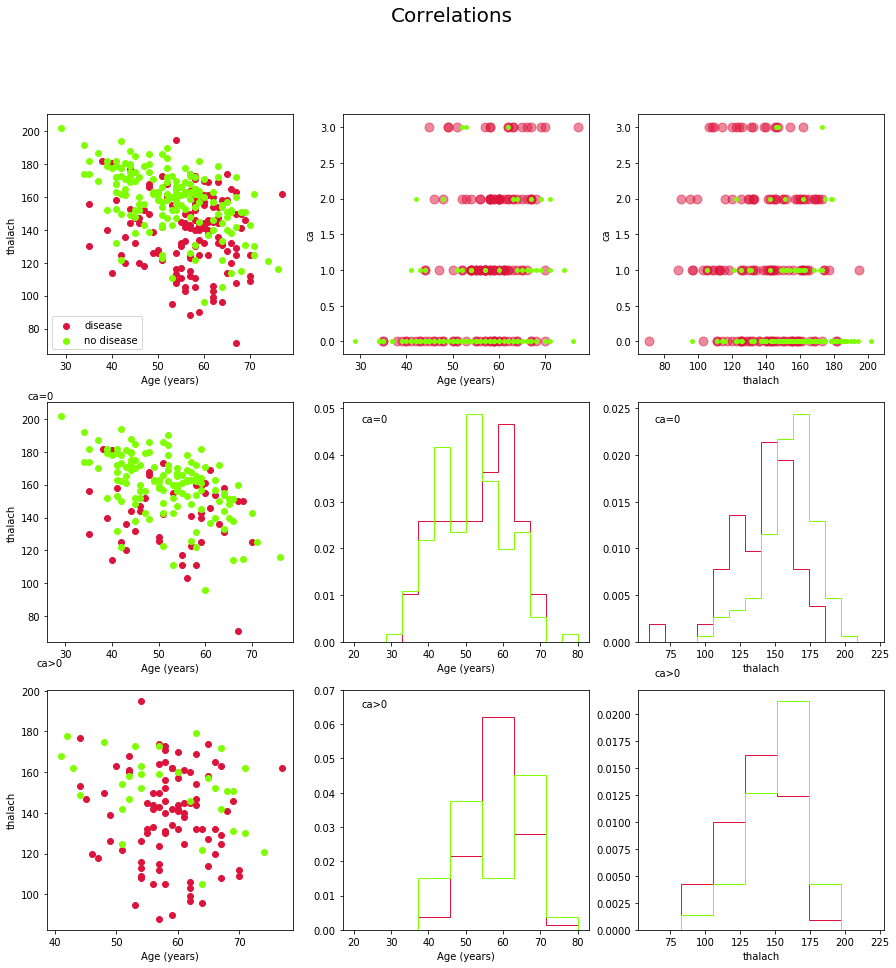

In [5]:
'''
Make correlation plots for the features age, thalach, and ca.
'''
import numpy as np

fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(15,15) )
plt.suptitle("Correlations", fontsize=20)
axes[0,0].scatter(df[df.hd==1].age,df[df.hd==1].thalach,color=["crimson"],label="disease")
axes[0,0].scatter(df[df.hd==0].age,df[df.hd==0].thalach,color=["chartreuse"],label="no disease")
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("thalach")
axes[0,0].legend(prop={'size': 10},loc="lower left")
axes[0,1].scatter(df[df.hd==1].age,df[df.hd==1].ca,color=["crimson"],s=80,alpha=0.5,label="disease")
axes[0,1].scatter(df[df.hd==0].age,df[df.hd==0].ca,color=["chartreuse"],s=15,label="no disease")
axes[0,1].set_xlabel("Age (years)")
axes[0,1].set_ylabel("ca")
axes[0,2].scatter(df[df.hd==1].thalach,df[df.hd==1].ca,color=["crimson"],s=80,alpha=0.5,label="disease")
axes[0,2].scatter(df[df.hd==0].thalach,df[df.hd==0].ca,color=["chartreuse"],s=15,label="no disease")
axes[0,2].set_xlabel("thalach")
axes[0,2].set_ylabel("ca")
axes[1,0].scatter(df[(df.hd==1)&(df.ca==0)].age,df[(df.hd==1)&(df.ca==0)].thalach,\
                  color=["crimson"],label="disease")
axes[1,0].scatter(df[(df.hd==0)&(df.ca==0)].age,df[(df.hd==0)&(df.ca==0)].thalach,\
                  color=["chartreuse"],label="no disease")
axes[1,0].text(22.0,212.0,"ca=0")
axes[1,0].set_xlabel("Age (years)")
axes[1,0].set_ylabel("thalach")
bins = np.linspace(20, 80, 15)
axes[1,1].hist(df[(df.hd==1)&(df.ca==0)].age.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[1,1].hist(df[(df.hd==0)&(df.ca==0)].age.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[1,1].text(22.0,0.047,"ca=0")
axes[1,1].set_xlabel("Age (years)")
bins = np.linspace(60, 220, 15)
axes[1,2].hist(df[(df.hd==1)&(df.ca==0)].thalach.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[1,2].hist(df[(df.hd==0)&(df.ca==0)].thalach.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[1,2].text(64.0,0.0235,"ca=0")
axes[1,2].set_xlabel("thalach")
axes[2,0].scatter(df[(df.hd==1)&(df.ca>0)].age,df[(df.hd==1)&(df.ca>0)].thalach,\
                  color=["crimson"],label="disease")
axes[2,0].scatter(df[(df.hd==0)&(df.ca>0)].age,df[(df.hd==0)&(df.ca>0)].thalach,\
                  color=["chartreuse"],label="no disease")
axes[2,0].text(37.0,212.0,"ca>0")
axes[2,0].set_xlabel("Age (years)")
axes[2,0].set_ylabel("thalach")
bins = np.linspace(20, 80, 8)
axes[2,1].hist(df[(df.hd==1)&(df.ca>0)].age.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[2,1].hist(df[(df.hd==0)&(df.ca>0)].age.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[2,1].text(22.0,0.065,"ca>0")
axes[2,1].set_xlabel("Age (years)")
axes[2,1].set_ylim(0.0,0.07)
bins = np.linspace(60, 220, 8)
axes[2,2].hist(df[(df.hd==1)&(df.ca>0)].thalach.tolist(),bins,color=["crimson"],\
               histtype="step",normed=True,label="disease")
axes[2,2].hist(df[(df.hd==0)&(df.ca>0)].thalach.tolist(),bins,color=["chartreuse"],\
               histtype="step",normed=True,label="no disease")
axes[2,2].text(64.0,0.0235,"ca>0")
axes[2,2].set_xlabel("thalach")
plt.show()